In [1]:
from diffusers import AudioDiffusionPipeline
from genaibook.core import get_device

import IPython.display as ipd
import torch

device = get_device()


/Users/jorocca/Desktop/Projects/AI Practice/Transformers-Diffusions/.venv/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


In [2]:
pipe = AudioDiffusionPipeline.from_pretrained("teticio/audio-diffusion-ddim-256").to(device)
output = pipe()

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/jorocca/.cache/huggingface/hub/models--teticio--audio-diffusion-ddim-256/snapshots/f5606c5138496ecdcbd096a4446eb6d03ae690cb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/jorocca/.cache/huggingface/hub/models--teticio--audio-diffusion-ddim-256/snapshots/f5606c5138496ecdcbd096a4446eb6d03ae690cb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Expected types for unet: (<class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>,), got <class 'diffusers.models.unets.unet_2d.UNet2DModel'>.


  0%|          | 0/50 [00:00<?, ?it/s]

In [3]:
audio_array = output.audios.squeeze()  # removes all singleton dimensions
ipd.Audio(data=output.audios[0], rate=16000)

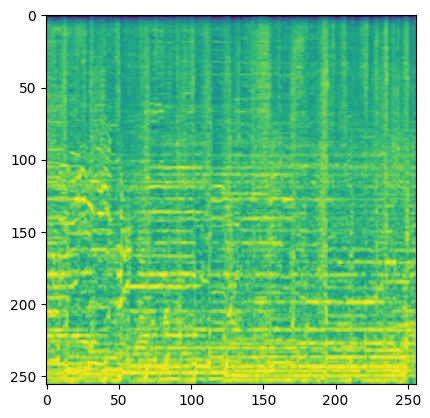

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.imshow(np.flip(np.array(output.images[0])))
plt.show()

In [5]:
from diffusers import StableDiffusionImg2ImgPipeline, StableDiffusionPipeline

In [6]:
pipe = StableDiffusionPipeline.from_pretrained("riffusion/riffusion-model-v1", torch_dtype=torch.float16)
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/jorocca/.cache/huggingface/hub/models--riffusion--riffusion-model-v1/snapshots/8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/jorocca/.cache/huggingface/hub/models--riffusion--riffusion-model-v1/snapshots/8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /Users/jorocca/.cache/huggingface/hub/models--riffusion--riffusion-model-v1/snapshots/8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/jorocca/.cache/huggingface/hub/models--riffusion--riffusion-model-v1/snapshots/8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/Users/jorocca/Desktop/Projects/AI Practice/Transformers-Diffu

In [7]:
prompt = "slow piano piece, classical"
negative_prompt= "drums"

In [8]:
spec_image = pipe(prompt, negative_prompt=negative_prompt, height=512, width=512).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

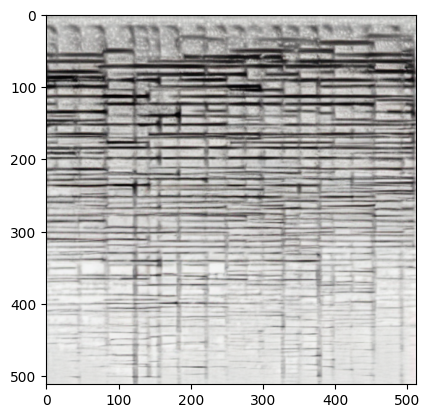

In [9]:
plt.figure()
plt.imshow(np.flip(np.array(spec_image)))
plt.show()

In [10]:
from diffusers import StableDiffusionImg2ImgPipeline
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("riffusion/riffusion-model-v1", torch_dtype=torch.float16)
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/jorocca/.cache/huggingface/hub/models--riffusion--riffusion-model-v1/snapshots/8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/jorocca/.cache/huggingface/hub/models--riffusion--riffusion-model-v1/snapshots/8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /Users/jorocca/.cache/huggingface/hub/models--riffusion--riffusion-model-v1/snapshots/8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/jorocca/.cache/huggingface/hub/models--riffusion--riffusion-model-v1/snapshots/8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/Users/jorocca/Desktop/Projects/AI Practice/Transformers-Diffu

In [11]:
prompts = "guitar, acoustic, calmed"
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(
    prompt=prompt,
    image=spec_image,
    strength=0.7,
    guidance_scale=8,
    generator=generator
).images[0]

  0%|          | 0/35 [00:00<?, ?it/s]

In [12]:
from diffusers import DanceDiffusionPipeline

In [13]:
pipe = DanceDiffusionPipeline.from_pretrained("harmonai/maestro-150k", torch_dtype=torch.float16).to(device)
audio = pipe(audio_length_in_s=5, num_inference_steps=50).audios[0]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/jorocca/.cache/huggingface/hub/models--harmonai--maestro-150k/snapshots/fd9b508aa66fb717fe59993eb0c7f33923f05f87/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/jorocca/.cache/huggingface/hub/models--harmonai--maestro-150k/snapshots/fd9b508aa66fb717fe59993eb0c7f33923f05f87/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

In [14]:
ipd.Audio(data=audio, rate=16000)